<a href="https://colab.research.google.com/github/Sigma-V/Image-CNN-classifier-/blob/main/CNN_classifer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#downloading all the required dependicies
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


In [3]:
#downloading the dataset
(training_images,training_labels),(testing_images,testing_labels) = datasets.cifar10.load_data()
training_images,testing_images = training_images/255.0,testing_images/255.0

170498071/170498071 [==============================] - 3s 0us/step


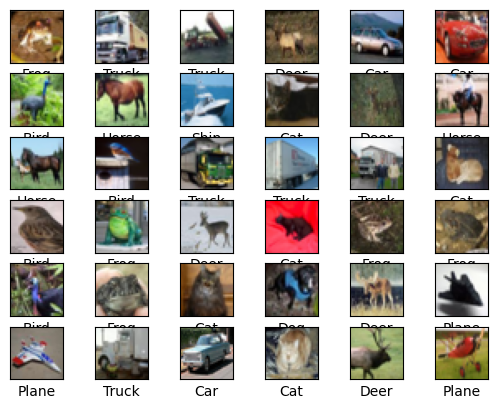

In [11]:
#all the classes defined as per the data
class_names =['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

#visualising the images
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [16]:
training_images =  training_images[:50000]
training_labels = training_labels[:50000]
testing_images = testing_images[:10000]
testing_labels = testing_labels[:10000]

In [19]:
#model defination and training
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) #image size : 32x32 and 3 for RGB
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images,training_labels,epochs=15,validation_data=(testing_images,testing_labels))

Epoch 1/15
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5354 - accuracy: 0.4400 - val_loss: 1.3000 - val_accuracy: 0.5249
Epoch 2/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1640 - accuracy: 0.5892 - val_loss: 1.1220 - val_accuracy: 0.6076
Epoch 3/15
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0069 - accuracy: 0.6468 - val_loss: 0.9860 - val_accuracy: 0.6562
Epoch 4/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9107 - accuracy: 0.6799 - val_loss: 0.9399 - val_accuracy: 0.6727
Epoch 5/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8379 - accuracy: 0.7072 - val_loss: 0.9697 - val_accuracy: 0.6746
Epoch 6/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7839 - accuracy: 0.7250 - val_loss: 0.8978 - val_accuracy: 0.6908
Epoch 7/15
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7332 - accuracy: 0.7418 - val_loss: 0.8768 -

In [21]:
#model evaluation(checking the loss and accuracy)
loss,accuracy = model.evaluate(testing_images,testing_labels)
print("The loss for model is: ",loss)
print("Accuracy of model is: ", accuracy)


313/313 [==============================] - 5s 17ms/step - loss: 0.9327 - accuracy: 0.7137
The loss for model is:  0.932728111743927
Accuracy of model is:  0.713699996471405


In [36]:
#taking input and testing for random images from net
#for car

img = cv.imread('/content/download.jpg')
resized_img = cv.resize(img, (32, 32))

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

prediction = model.predict(np.array([resized_img])/255.0)
index = np.argmax(prediction)
print("the given image is of a",class_names[index])


1/1 [==============================] - 0s 26ms/step
the given image is of a Car


In [37]:
#taking input and testing for random images from net
#for horse

img = cv.imread('/content/horsee.jpg')
resized_img = cv.resize(img, (32, 32))

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

prediction = model.predict(np.array([resized_img])/255.0)
index = np.argmax(prediction)
print("the given image is of a",class_names[index])

1/1 [==============================] - 0s 24ms/step
the given image is of a Horse
